In [81]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html).**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Optional) [Your takeaway from the course](#15)

## Submission instructions <a name="si"></a>
<hr>
rubric={points:4}

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4. 
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. [Here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members) are some instructions on adding group members in Gradescope.  
- Be sure to follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).
- Upload the .ipynb file to Gradescope.
- **If the .ipynb file is too big or doesn't render on Gradescope for some reason, also upload a pdf or html in addition to the .ipynb.** 
- Make sure that your plots/output are rendered properly in Gradescope.

## Imports

In [82]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from lightgbm.sklearn import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

The problem "predicting whether a credit card client will default or not", is a classification problem in which the target value is "if the credit card will default or not". Since the target value is binary, we will make a credit card client defaulting 1 and not defaulting 0. The features "PAY_" and "BILL_" provide insight into the clients financial history, while the rest of the features provide information on the demographic the client belongs to (age, sex, education, etc).

In [83]:
credit_df = pd.read_csv("data/UCI_Credit_Card.csv")
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [84]:
train_df, test_df = train_test_split(credit_df,test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

First, we check if there are any missing values in the dataset that may interfere with our EDA.

In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                  

Based on the non-null count, there are no missing values in the dataset.

In [86]:
describe_df = train_df.describe()
describe_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [87]:
# Average of mean values for columns PAY_0 though PAY_6
pay_subset = describe_df.iloc[1][5:11]
pay_subset.mean()

5.781166666666667

#### Summary Statistics:
* mean default payment next month = 0.223238 
    * This summay statistics gives us an overall idea of how many of the target values (default payment next month) are positive or negative. Since the mean is positive, there are more 1's (not default payment made) than 0's (default payment made) in the dataset. 
* mean repayment status for September through April = -0.1848174603174603 
    * This summary statistic is the average of all the repayment statuses for the month of September through April. Finding the mean of the mean repayment status for each month allows us to see the general trend of repayment statuses for the entire dataset. Based on the value, there is most likely a lot of -1 repayment status values skewing the overall mean value negative. The large number of -1 values implies many of the sampled clients paid duly. 

#### Visualizations
* Histogram for each feature showing the distribution of the feature values in the training set separated by the positive and negative class. This is useful in seeing how the distributions may differ for each feature between classes.

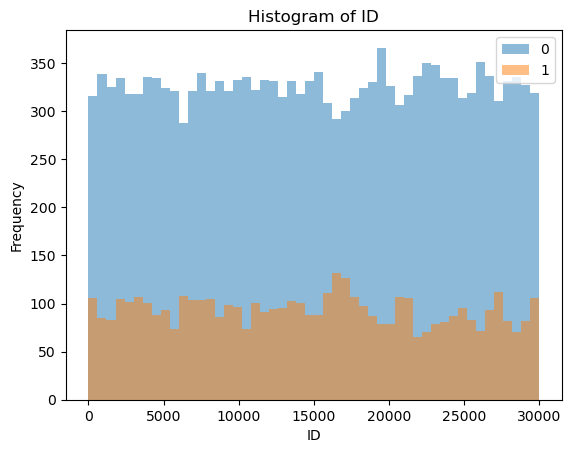

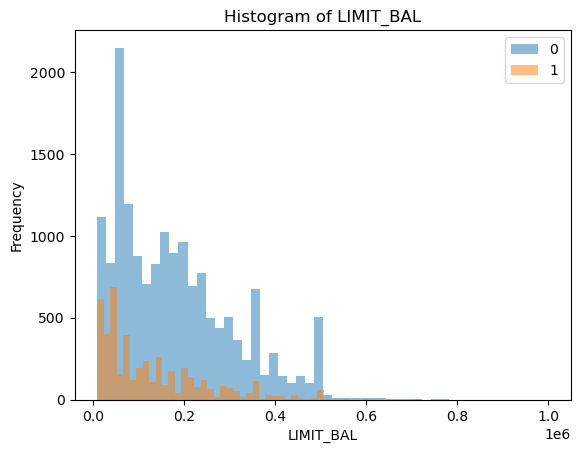

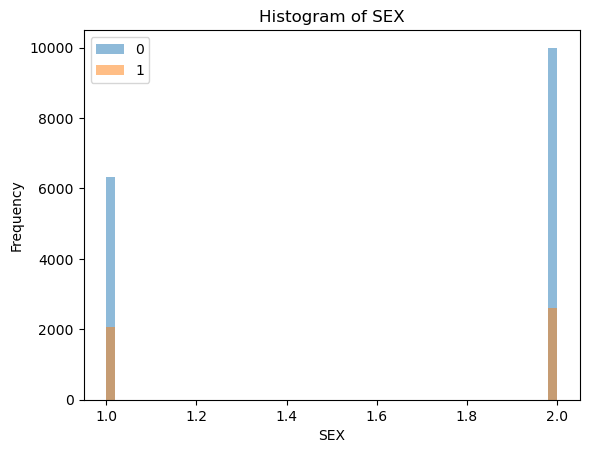

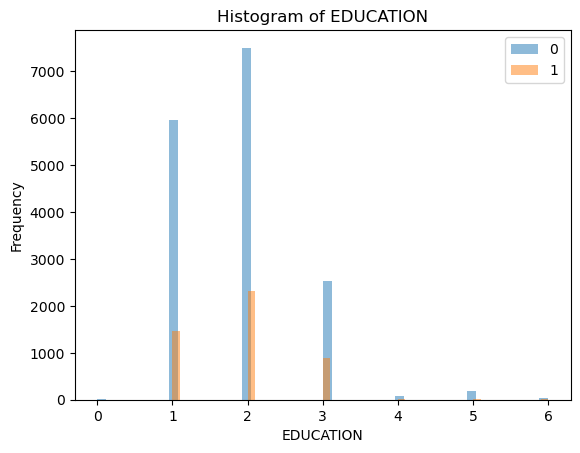

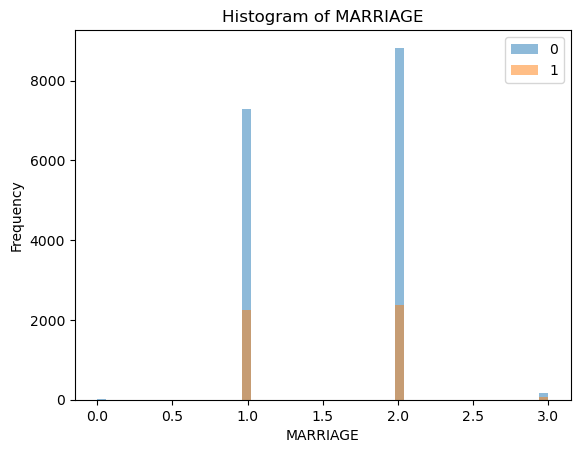

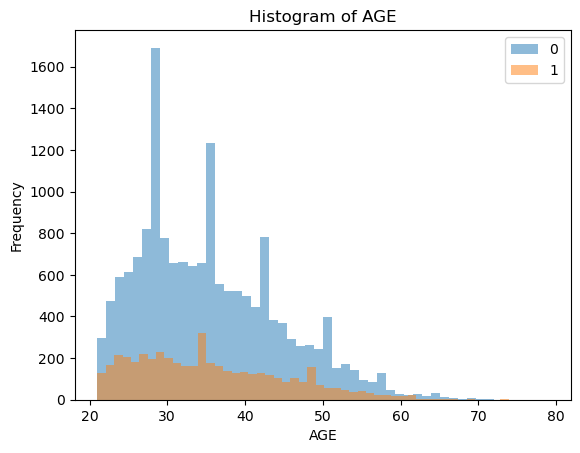

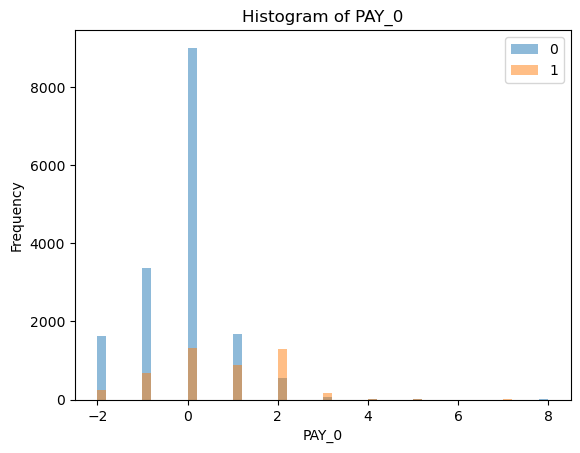

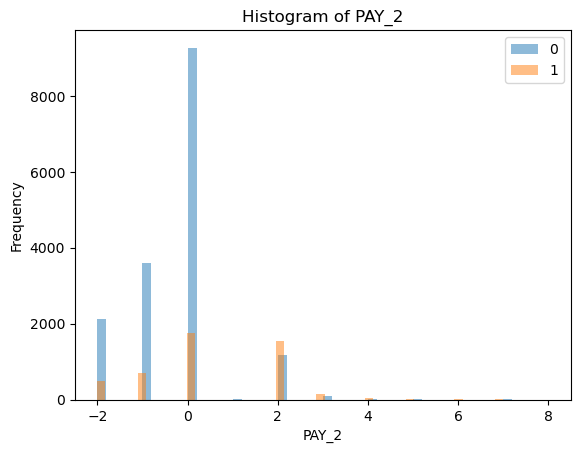

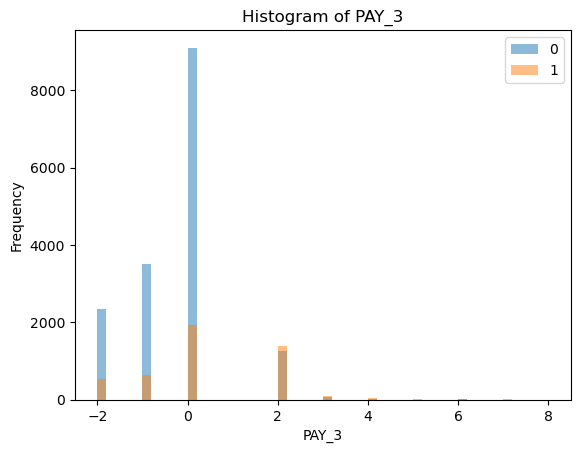

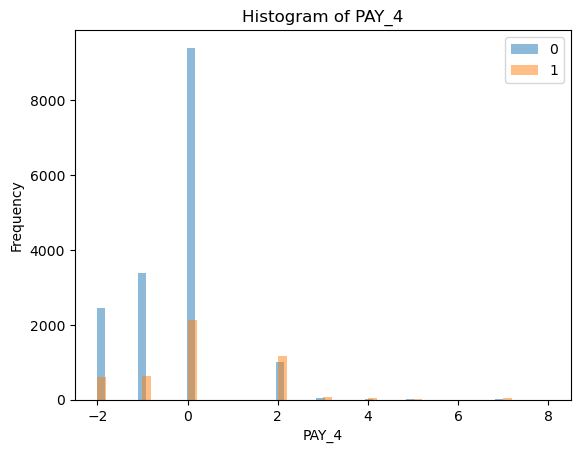

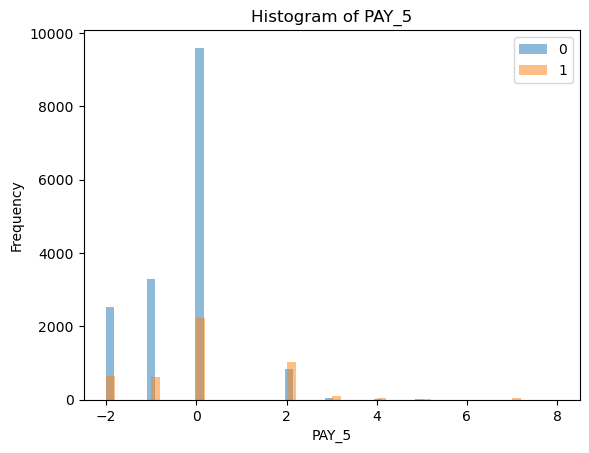

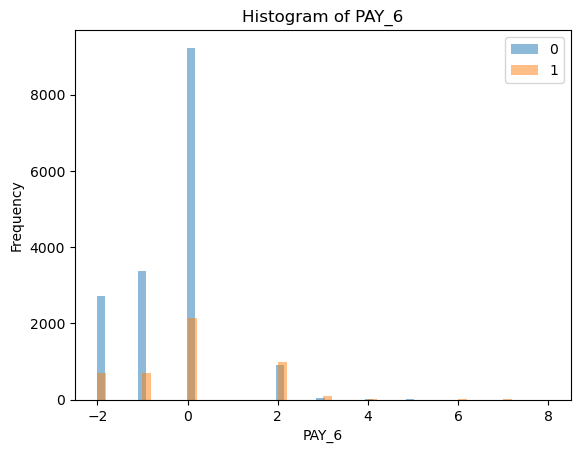

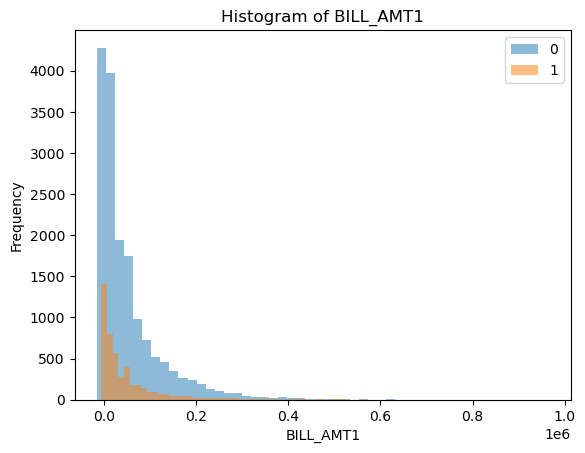

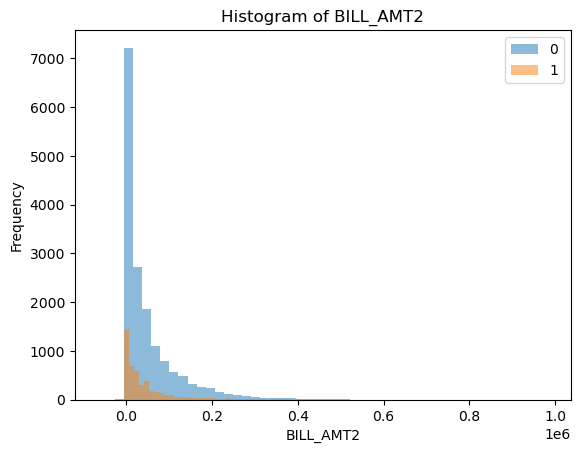

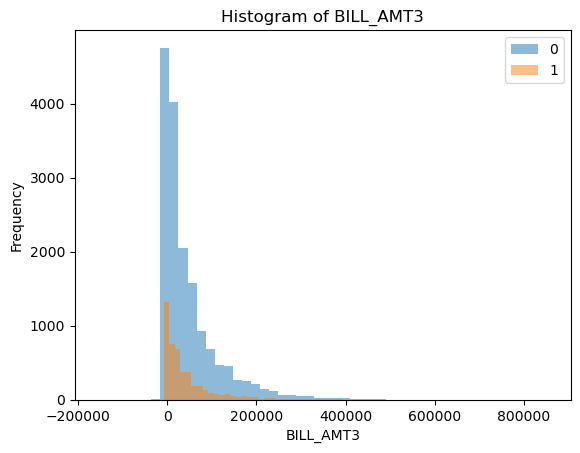

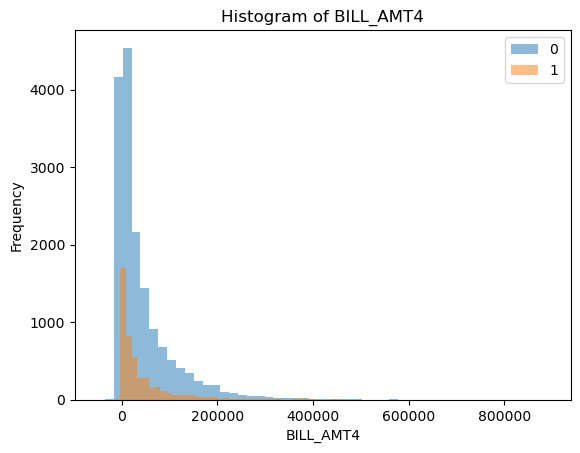

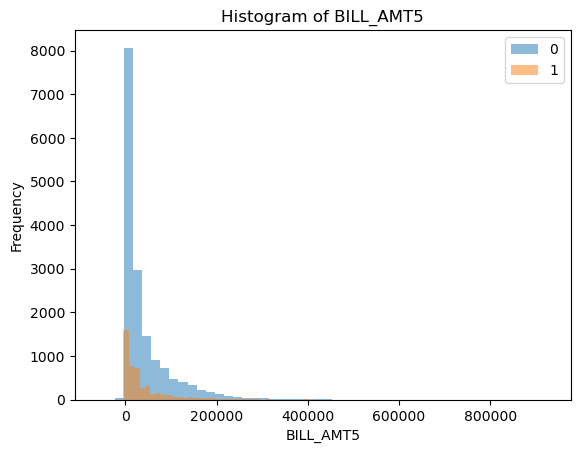

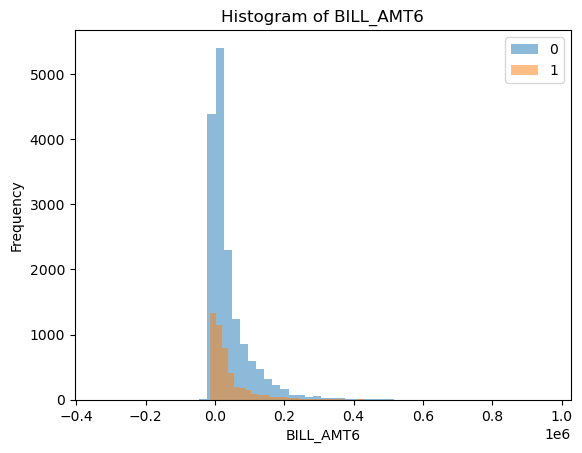

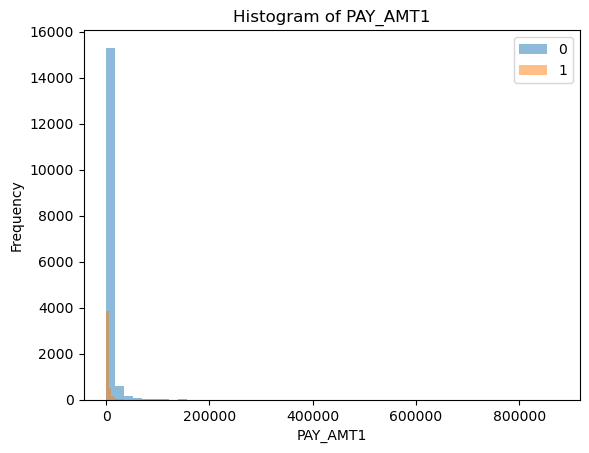

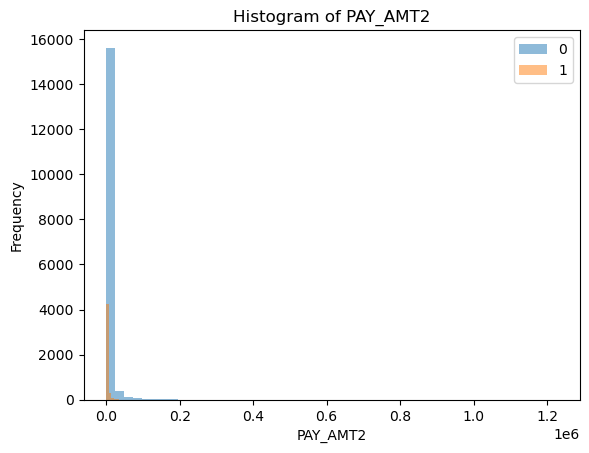

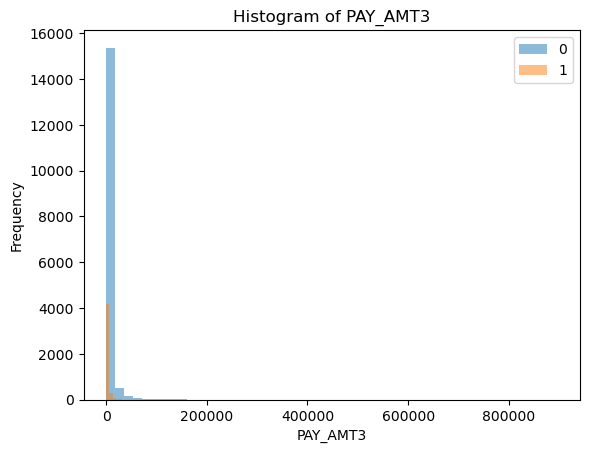

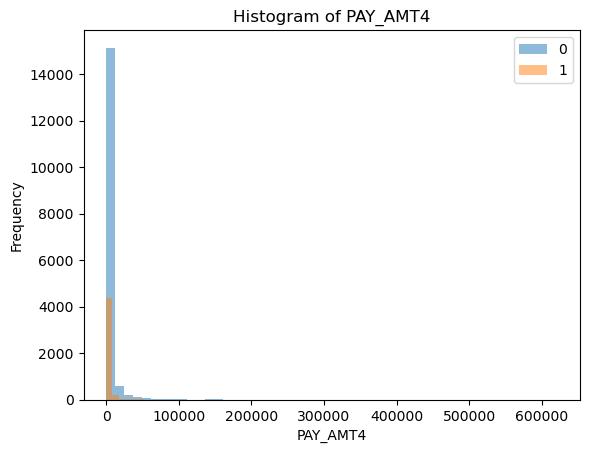

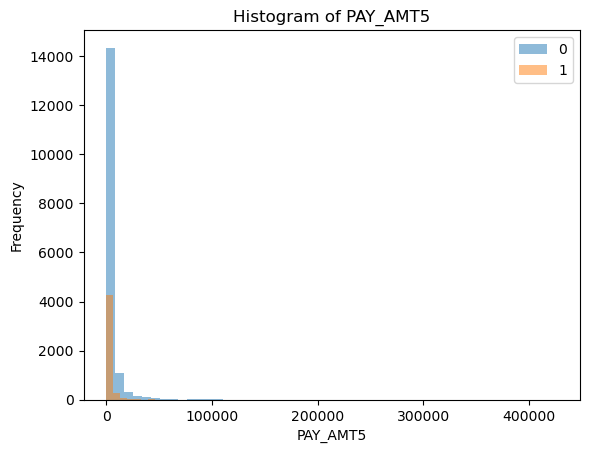

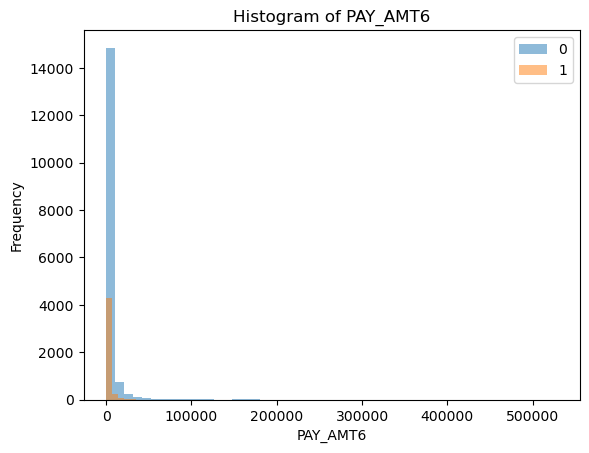

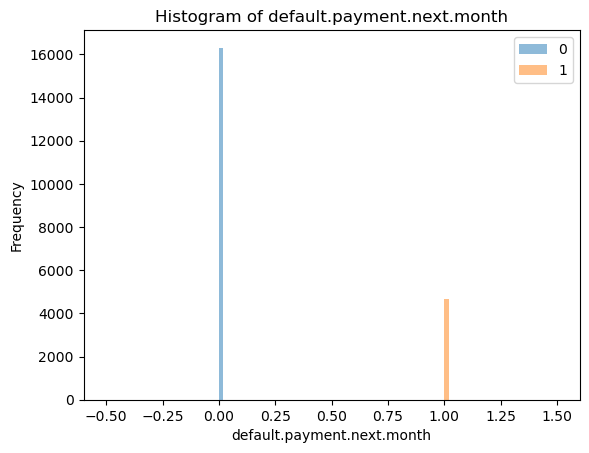

In [88]:
# using example code from hw2
for col in credit_df.columns:
    feat = col
    ax = train_df.groupby("default.payment.next.month")[feat].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [89]:
#create feature/target data
X_train, y_train = (train_df.drop(columns=["default.payment.next.month"]),train_df["default.payment.next.month"])
X_test, y_test = (test_df.drop(columns=["default.payment.next.month"]),test_df["default.payment.next.month"])

In [90]:
#1. 
numeric_features=["LIMIT_BAL","AGE","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5",
                  "BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]
categorical_features=["MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
drop_features=["ID","SEX"]
passthrough=["EDUCATION"]

In [91]:
# make transformers
numeric_transformer = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)

#2. make preprocessor/column transformer
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features),
    ("passthrough", passthrough),
)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3',
                                  'PAY_4', 'PAY_5', 'PAY_6']),
                                ('drop', 'drop', ['ID', 'SEX']),
                                ('passthrough', 'passthrough', ['EDUCATION'])])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [92]:
dummy = DummyClassifier(strategy="most_frequent")
pipe_dummy = make_pipeline(preprocessor, dummy)
scores = cross_validate(pipe_dummy, X_train, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.021022,0.005377,0.776905,0.776726
1,0.013384,0.004315,0.776905,0.776726
2,0.011696,0.003626,0.776667,0.776786
3,0.011979,0.003346,0.776667,0.776786
4,0.011329,0.003917,0.776667,0.776786


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

RandomSearch for hyperparameter tuning
n = 10

In [93]:
#1. Make preprocessor pipeline 
lr = LogisticRegression(solver='lbfgs', max_iter=100000)
lr_pipe = make_pipeline(preprocessor,lr)

#2. Score Logistic Regression model
scores = cross_validate(lr_pipe, X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.466594,0.003461,0.812381,0.822328
1,0.373544,0.003073,0.818571,0.820899
2,0.435573,0.003032,0.823333,0.820423
3,0.414179,0.003173,0.809048,0.822540
4,0.409809,0.003419,0.818571,0.821587
5,0.439147,0.003407,0.827619,0.820370
6,0.432264,0.003013,0.823810,0.820741
7,0.394360,0.003229,0.825714,0.819894
8,0.412361,0.003330,0.812857,0.821958
9,0.433971,0.003182,0.819048,0.820952


In [94]:
pd.DataFrame(scores).mean()

fit_time       0.421180
score_time     0.003232
test_score     0.819095
train_score    0.821169
dtype: float64

In [95]:
# Code adapted from lecture 8

#1. Set range of hyperparameter C values 
param_dist = {
    "logisticregression__C": np.linspace(1e-4, 1e5, 10),
}

#2. RandomSearch 
random_search = RandomizedSearchCV(
    lr_pipe, param_dist, n_iter=10, verbose=1, n_jobs=-1, random_state=123
)
random_search.fit(X_train, y_train);

#3. Store scores for lr on different hyperparameter
pd.DataFrame(random_search.cv_results_)[
    [
        "mean_test_score",
        # "mean_train_score",
        "param_logisticregression__C",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

Fitting 5 folds for each of 10 candidates, totalling 50 fits


rank_test_score,1,2,2,2,5,5,5,5,5,10
mean_test_score,0.819619,0.819571,0.819571,0.819571,0.819524,0.819524,0.819524,0.819524,0.819524,0.776762
param_logisticregression__C,44444.4445,11111.1112,55555.5556,66666.6667,22222.2223,33333.3334,77777.7778,88888.8889,100000.0,0.0001
mean_fit_time,3.741428,4.819602,3.48066,3.511364,4.234742,3.656252,4.101617,4.119562,2.915305,0.052101


In [96]:
best_C = random_search.cv_results_['params'][random_search.best_index_]["logisticregression__C"]
best_C

44444.4445

In [97]:
lr = LogisticRegression(C=best_C, solver='lbfgs', max_iter=100000)
lr_pipe_best = make_pipeline(preprocessor, lr)
scores = cross_validate(lr_pipe_best, X_train, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,1.504736,0.005249,0.816190,0.822738
1,1.616396,0.003659,0.817381,0.822202
2,1.442261,0.004207,0.822143,0.821190
3,1.385930,0.004431,0.825000,0.820714
4,1.813461,0.004150,0.817381,0.822500


In [98]:
pd.DataFrame(scores).mean()

fit_time       1.552557
score_time     0.004339
test_score     0.819619
train_score    0.821869
dtype: float64

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

Three methods
1. Random Forest
2. LGBM
3. KNN


#### Random Forest

In [99]:
# Function from hw3
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)


In [101]:
# Code adapted from lecture 11
results = {}
scoring_metric = "f1"

pipe_rf = make_pipeline(
    preprocessor, RandomForestClassifier(random_state=123, n_jobs=-1)
)
pipe_lgbm = make_pipeline(preprocessor, LGBMClassifier(random_state=123))
pipe_knn = make_pipeline(preprocessor, KNeighborsClassifier())
                         
classifiers = {
    "random forest": pipe_rf,
    "LightGBM": pipe_lgbm,
    "knn": pipe_knn,
}

for (name, model) in classifiers.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, scoring=scoring_metric
    )

In [102]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
random forest,0.680 (+/- 0.028),0.031 (+/- 0.001),0.469 (+/- 0.013),0.998 (+/- 0.000)
LightGBM,0.253 (+/- 0.034),0.010 (+/- 0.001),0.478 (+/- 0.011),0.576 (+/- 0.006)
knn,0.012 (+/- 0.001),0.134 (+/- 0.007),0.426 (+/- 0.011),0.568 (+/- 0.004)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

In [103]:
#forward selection

pipe_forward = make_pipeline(
    StandardScaler(),
    SequentialFeatureSelector(
        LogisticRegression(max_iter=1000), 
                           direction="forward", 
                           n_features_to_select="auto"),
    RandomForestClassifier(n_estimators=100, random_state=123),
)
pd.DataFrame(
    cross_validate(pipe_forward, X_train, y_train, return_train_score=True)
).mean()

fit_time       8.166184
score_time     0.055195
test_score     0.815190
train_score    0.999964
dtype: float64

In [105]:
from sklearn.feature_selection import RFECV
#code adapted from lecture 13

rfe_pipe = make_pipeline(
    StandardScaler(),
    RFECV(LogisticRegression(max_iter=2000), cv=10),
    RandomForestClassifier(n_estimators=100, random_state=42),
)

pd.DataFrame(cross_validate(rfe_pipe, X_train, y_train, return_train_score=True)).mean()

fit_time       3.599986
score_time     0.013002
test_score     0.818000
train_score    0.818536
dtype: float64

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

#### KNN

In [116]:
# Code adapted from lecture 8
param_dist = {
    "kneighborsclassifier__n_neighbors": np.arange(1, 100, 5)
},

#2. RandomSearch 
random_search = RandomizedSearchCV(
    pipe_knn, param_dist, n_iter=10, verbose=1, n_jobs=-1, random_state=123
)
random_search.fit(X_train, y_train);

#3. Store scores for lr on different hyperparameter
pd.DataFrame(random_search.cv_results_)[
    [
        "mean_test_score",
        "param_kneighborsclassifier__n_neighbors",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

Fitting 5 folds for each of 10 candidates, totalling 50 fits


rank_test_score,1,2,3,4,5,6,7,8,9,10
mean_test_score,0.811381,0.810143,0.809857,0.809762,0.808905,0.808333,0.807571,0.807048,0.806048,0.730619
param_kneighborsclassifier__n_neighbors,26,41,36,21,61,71,76,86,96,1
mean_fit_time,0.02985,0.018811,0.020626,0.029832,0.021336,0.062396,0.025915,0.02379,0.019284,0.022586


In [126]:
# Code adapted from lecture 8
param_dist = {
    "randomforestclassifier__max_features": np.arange(1, 15, 5),
    "randomforestclassifier__max_depth": np.arange(1, 100, 5),

},

#2. RandomSearch 
random_search = RandomizedSearchCV(
    pipe_rf, param_dist, n_iter=10, verbose=1, n_jobs=-1, random_state=123
)
random_search.fit(X_train, y_train);

#3. Store scores for lr on different hyperparameter
pd.DataFrame(random_search.cv_results_)[
    [
        "mean_test_score",
        "param_randomforestclassifier__max_features",
        "param_randomforestclassifier__max_depth",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

Fitting 5 folds for each of 10 candidates, totalling 50 fits


rank_test_score,1,2,3,3,3,3,7,8,9,10
mean_test_score,0.81481,0.814286,0.814238,0.814238,0.814238,0.814238,0.812381,0.812,0.811905,0.811333
param_randomforestclassifier__max_features,6,6,6,6,6,6,1,1,1,1
param_randomforestclassifier__max_depth,21,51,71,86,66,91,26,41,31,66
mean_fit_time,1.806664,2.43175,2.508898,2.450529,2.326257,2.284207,1.36805,1.630655,1.496283,1.616869


In [132]:
# Code adapted from lecture 8

# TODO: choose uniform numbers
param_dist = {
    "lgbmclassifier__learning_rate": uniform(1, 15),
},

#2. RandomSearch 
random_search = RandomizedSearchCV(
    pipe_lgbm, param_dist, n_iter=10, verbose=1, n_jobs=-1, random_state=123
)
random_search.fit(X_train, y_train);

#3. Store scores for lr on different hyperparameter
pd.DataFrame(random_search.cv_results_)[
    [
        "mean_test_score",
        "param_lgbmclassifier__learning_rate",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

Fitting 5 folds for each of 10 candidates, totalling 50 fits


rank_test_score,1,2,3,4,5,6,7,8,9,10
mean_test_score,0.767381,0.679333,0.676238,0.640429,0.602,0.556333,0.517286,0.498952,0.492619,0.434571
param_lgbmclassifier__learning_rate,9.269722,5.29209,6.881763,7.346597,8.213979,4.402772,15.711463,11.792035,11.447038,11.272446
mean_fit_time,0.118469,0.175597,0.119141,0.134497,0.135355,0.123687,0.120095,0.137911,0.175338,0.115801


1. KNN - n_neighbors
2. Random Forest - n_estimators, max_depth, max_features 
3.  LGBM - learning_weight

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

Congratulations on finishing this project. This was a tricky one but you did it!

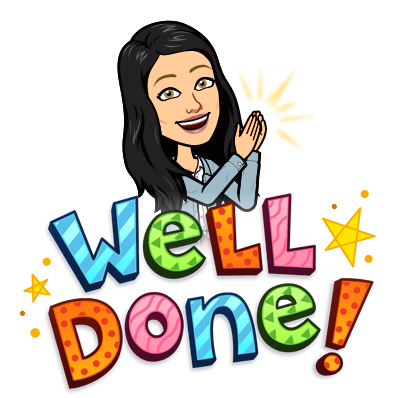

In [104]:
from IPython.display import Image

Image("img/eva-well-done.png")